**SEGMENTASI NASABAH YANG MEMILIKI POTENSI TINGGI UNTUK INVESTASI JANGKA PANJANG**

Aqila Khansa Hartanto

## Import Data

In [1]:
# Import library
import numpy as np
import pandas as pd
import os

In [2]:
# Menggunakan directory google drive
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [3]:
os.listdir("/content/drive/MyDrive/Magangg")


['Challenge 1 ']

In [4]:
df = pd.read_excel("Magangg/Challenge 1 /idx ds_challenge 2b.xlsx")


In [5]:
display(df)

,customer_id,age,job,marital,education,years_as_customer,avg_monthly_balance,total_products_owned,housing_loan,personal_loan,credit_card,investment_experience,contact_channel,relationship_manager_contact,subscription
0,1,46,management,married,tertiary,12,18000000,4,no,no,yes,yes,cellular,yes,yes
1,2,34,technician,married,secondary,6,5200000,2,yes,no,yes,no,cellular,no,no
2,3,58,retired,married,primary,20,32000000,5,no,no,no,yes,telephone,yes,yes
3,4,29,admin,single,secondary,3,2800000,1,no,no,no,no,cellular,no,no
4,5,42,self-employed,married,tertiary,10,15000000,3,yes,yes,yes,yes,cellular,yes,yes
5,6,37,services,married,secondary,7,6400000,2,yes,no,yes,no,cellular,no,no
6,7,50,entrepreneur,married,tertiary,15,24000000,4,no,no,yes,yes,cellular,yes,yes
7,8,31,student,single,secondary,2,1700000,1,no,no,no,no,cellular,no,no
8,9,45,management,divorced,tertiary,11,19500000,3,no,no,yes,yes,cellular,yes,yes
9,10,39,technician,married,secondary,8,7200000,2,yes,no,yes,no,telephone,no,no


In [6]:
print(df.shape)

(30, 15)


In [7]:
print(df.dtypes)

customer_id                      int64
age                              int64
job                             object
marital                         object
education                       object
years_as_customer                int64
avg_monthly_balance              int64
total_products_owned             int64
housing_loan                    object
personal_loan                   object
credit_card                     object
investment_experience           object
contact_channel                 object
relationship_manager_contact    object
subscription                    object
dtype: object


## Eksplorasi Data

### Profiling Data

In [8]:
#install library
!pip install pandas
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.9 MB/s eta 0:00:00


In [8]:
#import library
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
#buat profil
profile_df = ProfileReport(df, title="df report")

In [ ]:
#tampilkan dalam notebook
profile_df.to_notebook_iframe()

Interpretasi dari EDA awal

Dari profiling data tidak ditemukan adanya masalah data sepereti missing value dan duplikasi

## Preprocessing

In [9]:
# Kolom ID tidak berpengaruh ke keputusan investasi
df = df.drop(columns=["customer_id"])


In [10]:
# Standardisasi nama kolom
df.columns = df.columns.str.lower().str.replace(" ", "_")


In [11]:
# Target
df["subscription"] = df["subscription"].str.lower().map({
    "yes": 1,
    "no": 0
})

df = df.dropna(subset=["subscription"])

## EDA untuk Melihat Hubungan antara Profil Nasabah dan Keputusan Berlangganan Deposito

In [12]:
profil_nasabah = [
    "job",
    "education",
    "marital",
    "contact_channel",
    "housing_loan",
    "personal_loan",
    "credit_card",
    "investment_experience",
    "relationship_manager_contact"
]

# pastikan kolomnya ada
profil_nasabah = [c for c in profil_nasabah if c in df.columns]
profil_nasabah


['job',
 'education',
 'marital',
 'contact_channel',
 'housing_loan',
 'personal_loan',
 'credit_card',
 'investment_experience',
 'relationship_manager_contact']

In [13]:
for col in profil_nasabah:
    print(f"\n=== Profil Nasabah: {col} ===")

    prop = df.groupby(col)["subscription"].mean().sort_values(ascending=False)
    print(prop)



=== Profil Nasabah: job ===
job
entrepreneur     1.0
management       1.0
retired          1.0
self-employed    1.0
admin            0.0
services         0.0
student          0.0
technician       0.0
Name: subscription, dtype: float64

=== Profil Nasabah: education ===
education
primary      1.0
tertiary     1.0
secondary    0.0
Name: subscription, dtype: float64

=== Profil Nasabah: marital ===
marital
married     0.666667
divorced    0.500000
single      0.000000
Name: subscription, dtype: float64

=== Profil Nasabah: contact_channel ===
contact_channel
cellular     0.541667
telephone    0.333333
Name: subscription, dtype: float64

=== Profil Nasabah: housing_loan ===
housing_loan
no     0.666667
yes    0.111111
Name: subscription, dtype: float64

=== Profil Nasabah: personal_loan ===
personal_loan
yes    1.000000
no     0.482759
Name: subscription, dtype: float64

=== Profil Nasabah: credit_card ===
credit_card
yes    0.578947
no     0.363636
Name: subscription, dtype: float64

===

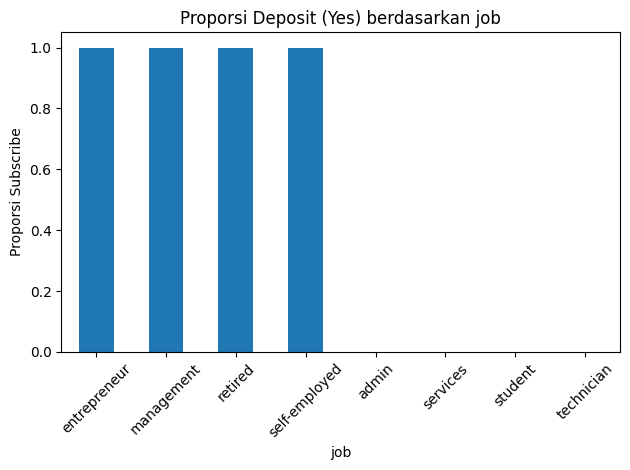

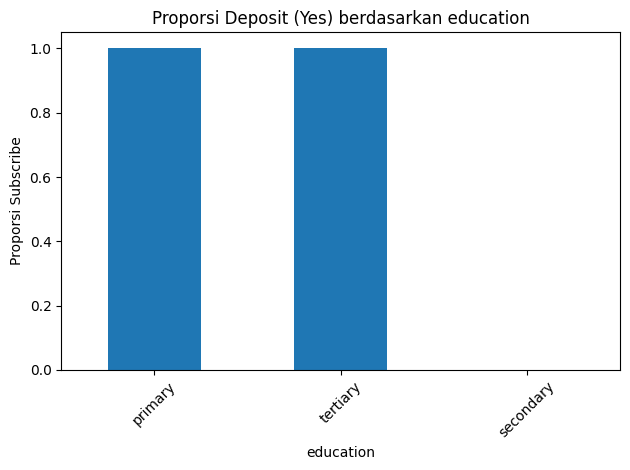

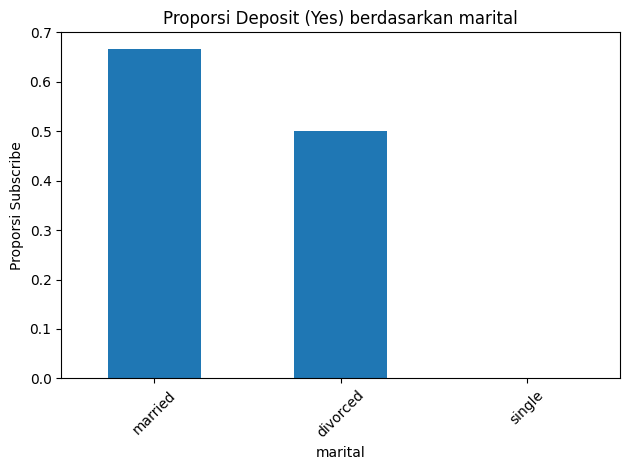

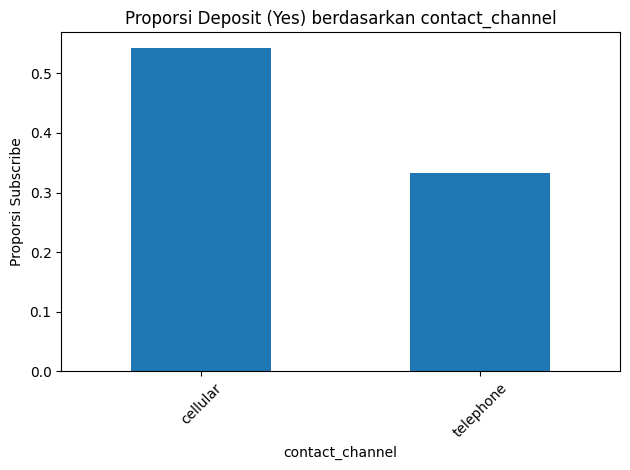

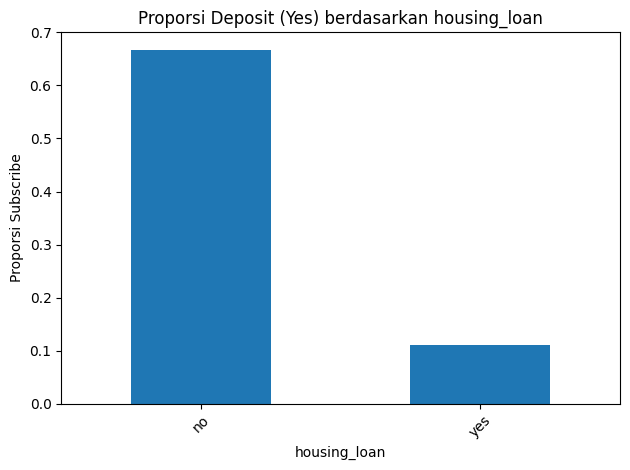

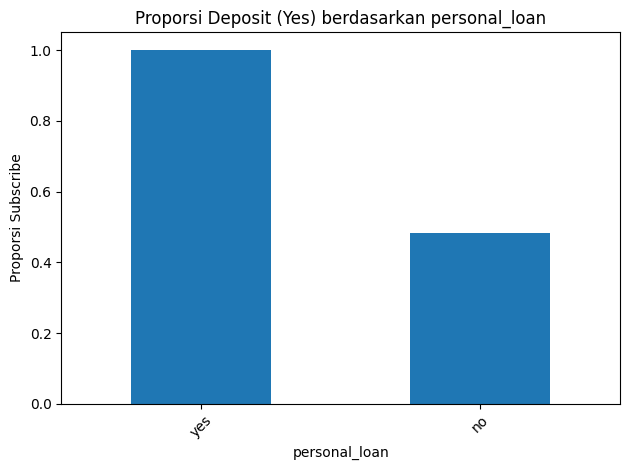

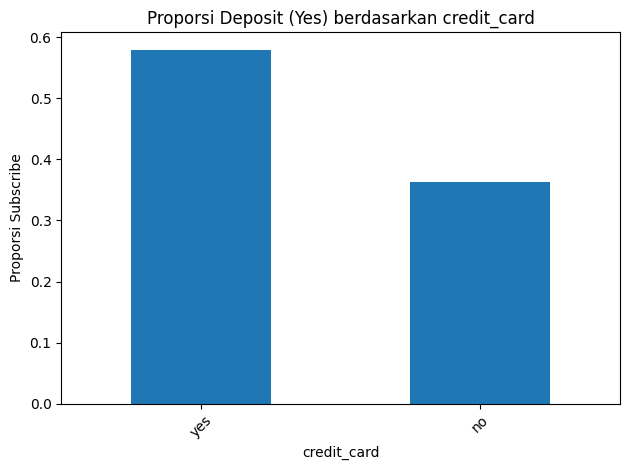

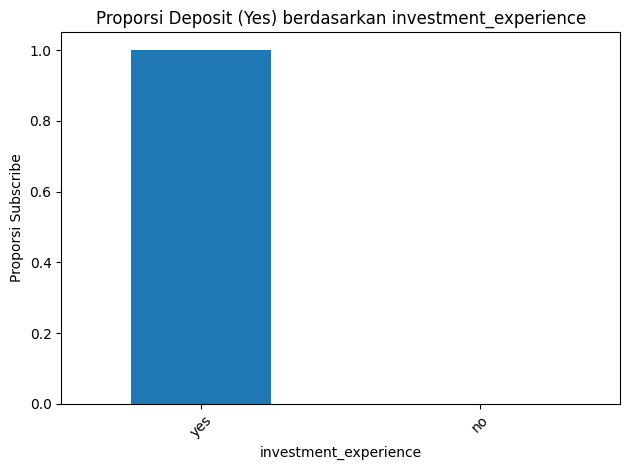

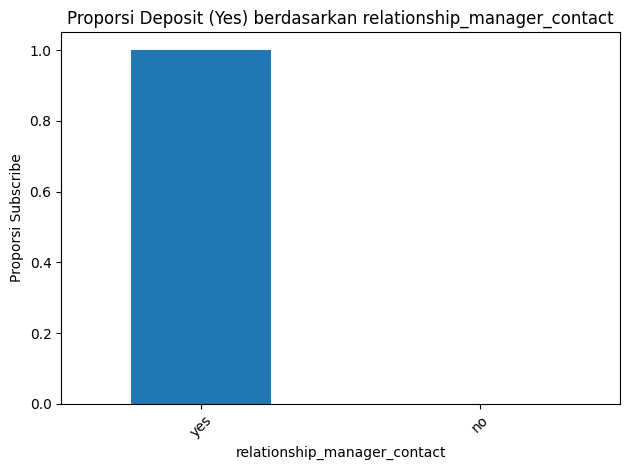

In [14]:
# Plot
import matplotlib.pyplot as plt

for col in profil_nasabah:
    prop = df.groupby(col)["subscription"].mean().sort_values(ascending=False)

    prop.plot(kind="bar")
    plt.title(f"Proporsi Deposit (Yes) berdasarkan {col}")
    plt.ylabel("Proporsi Subscribe")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Interpretasi Task 1**

Berdasarkan hasil analisis data, terlihat bahwa minat berlangganan deposito paling tinggi muncul pada kelompok nasabah tertentu. Nasabah dengan pekerjaan seperti entrepreneur, manajemen, wiraswasta, dan pensiunan menunjukkan tingkat berlangganan deposito hingga 100%, sementara pekerjaan seperti admin, teknisi, pelajar, dan layanan umum tidak menunjukkan partisipasi sama sekali. Dari sisi pendidikan, seluruh nasabah berpendidikan primary dan tertiary tercatat berlangganan deposito, sedangkan lulusan secondary tidak. Nasabah yang sudah menikah juga lebih tertarik berinvestasi, dengan tingkat berlangganan sekitar 66,7%, dibandingkan nasabah lajang yang tidak menunjukkan minat sama sekali. Cara bank menghubungi nasabah berpengaruh, di mana kontak melalui ponsel (54,2%) lebih efektif dibandingkan telepon biasa (33,3%). Nasabah tanpa kredit perumahan memiliki kecenderungan berlangganan deposito yang jauh lebih tinggi (66,7%) dibandingkan mereka yang masih memiliki cicilan rumah (11,1%). Selain itu, nasabah yang memiliki kartu kredit (57,9%), pengalaman investasi (100%), serta pernah dihubungi oleh relationship manager (100%) menunjukkan minat yang jauh lebih besar terhadap deposito.

## Analisis Pola Berdasarkan Usia, Saldo, dan Status Pinjaman

### Analisis Pola Usia

In [15]:
df["Kelompok_Usia"] = pd.cut(
    df["age"],
    bins=[0, 30, 40, 50, 60, 100],
    labels=["<30", "30–40", "40–50", "50–60", ">60"]
)


In [16]:
# Proporsi deposito per usia
age_pattern = df.groupby("Kelompok_Usia")['subscription'].mean()
age_pattern


/tmp/ipython-input-319420237.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pattern = df.groupby("Kelompok_Usia")['subscription'].mean()


,subscription
Kelompok_Usia,
<30,0.0
30–40,0.0
40–50,1.0
50–60,1.0
>60,1.0


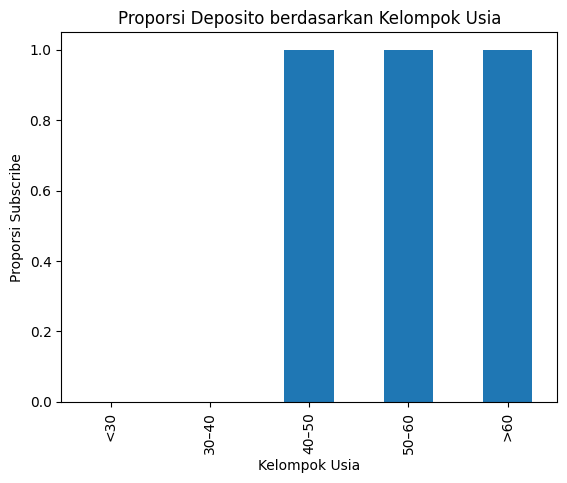

In [17]:
age_pattern.plot(kind="bar")
plt.title("Proporsi Deposito berdasarkan Kelompok Usia")
plt.ylabel("Proporsi Subscribe")
plt.xlabel("Kelompok Usia")
plt.show()


**Interpretasi Pola Usia**

Grafik menunjukkan bahwa nasabah berusia di bawah 40 tahun (<30 dan 30–40) tidak menunjukkan partisipasi dalam berlangganan deposito. Sebaliknya, pada kelompok usia 40–50, 50–60, dan di atas 60 tahun, seluruh nasabah tercatat berlangganan deposito dengan proporsi mencapai 100%. Hal ini mengindikasikan bahwa nasabah pada usia yang lebih matang cenderung memiliki orientasi keuangan jangka panjang dan stabilitas finansial yang lebih baik, sehingga lebih tertarik pada produk simpanan jangka panjang seperti deposito.

### Analisis Pola Saldo

In [18]:
df["Kelompok_Saldo"] = pd.qcut(
    df["avg_monthly_balance"],
    q=4,
    labels=["Rendah", "Menengah", "Tinggi", "Sangat Tinggi"]
)


In [19]:
Saldo_Range = (
    df.groupby("Kelompok_Saldo")["avg_monthly_balance"]
    .agg(
        min_balance="min",
        max_balance="max",
        rata_rata="mean"
    )
)

display(Saldo_Range)



/tmp/ipython-input-1350269449.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Kelompok_Saldo")["avg_monthly_balance"]


,min_balance,max_balance,rata_rata
Kelompok_Saldo,,,
Rendah,1300000,4800000,3062500.0
Menengah,5200000,7400000,6400000.0
Tinggi,15000000,21000000,18500000.0
Sangat Tinggi,22500000,37000000,29687500.0


In [20]:
balance_pattern = df.groupby("Kelompok_Saldo")["subscription"].mean()
balance_pattern


/tmp/ipython-input-3200815823.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_pattern = df.groupby("Kelompok_Saldo")["subscription"].mean()


,subscription
Kelompok_Saldo,
Rendah,0.0
Menengah,0.0
Tinggi,1.0
Sangat Tinggi,1.0


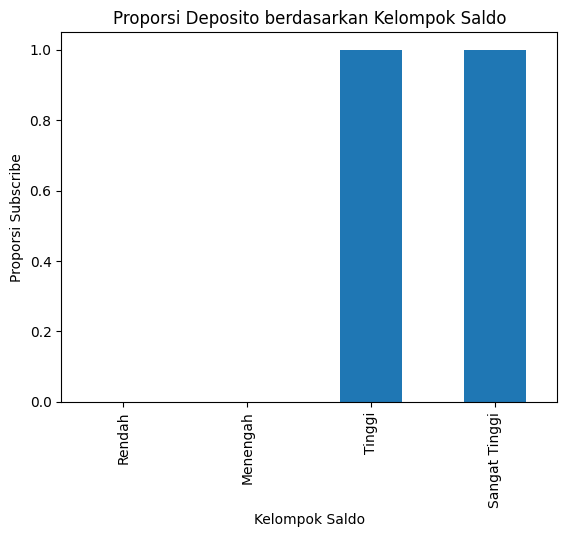

In [21]:
balance_pattern.plot(kind="bar")
plt.title("Proporsi Deposito berdasarkan Kelompok Saldo")
plt.ylabel("Proporsi Subscribe")
plt.xlabel("Kelompok Saldo")
plt.show()


**Interpretasi Pola Saldo**

Berdasarkan pengelompokan saldo, nasabah dengan saldo rendah dan menengah tidak menunjukkan minat berlangganan deposito. Sebaliknya, seluruh nasabah yang berada pada kelompok saldo tinggi dan sangat tinggi tercatat berlangganan deposito dengan proporsi 100%. Temuan ini menunjukkan bahwa tingkat finansial merupakan faktor utama dalam keputusan investasi, di mana nasabah dengan kemampuan finansial yang lebih besar memiliki peluang jauh lebih tinggi untuk mengalokasikan dana ke produk deposito

### Analisis Pola Status Pinjaman

In [22]:
# Personal Loan
personal_loan_pattern = df.groupby("personal_loan")["subscription"].mean()
personal_loan_pattern

,subscription
personal_loan,
no,0.482759
yes,1.000000


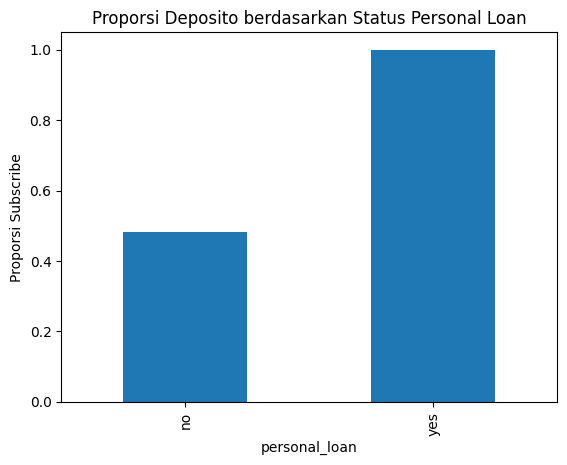

In [23]:
personal_loan_pattern.plot(kind="bar")
plt.title("Proporsi Deposito berdasarkan Status Personal Loan")
plt.ylabel("Proporsi Subscribe")
plt.show()


**Interpretasi Personal Loan**

Grafik status personal loan menunjukkan perbedaan yang cukup jelas. Nasabah yang memiliki personal loan seluruhnya berlangganan deposito (100%), sedangkan nasabah tanpa personal loan hanya sekitar 48% yang berlangganan deposito. Meskipun hasil ini tampak berlawanan dengan asumsi umum, temuan ini mengindikasikan bahwa nasabah dengan personal loan kemungkinan merupakan nasabah aktif secara finansial dan memiliki kemampuan pengelolaan keuangan yang baik.

In [24]:
# Housing LOan
housing_loan_pattern = df.groupby("housing_loan")["subscription"].mean()
housing_loan_pattern


,subscription
housing_loan,
no,0.666667
yes,0.111111


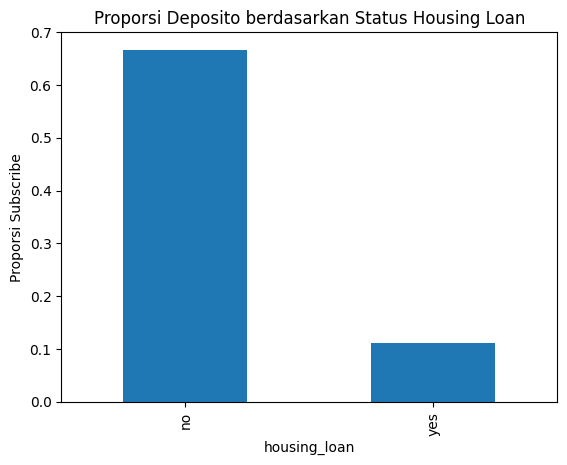

In [25]:
housing_loan_pattern.plot(kind="bar")
plt.title("Proporsi Deposito berdasarkan Status Housing Loan")
plt.ylabel("Proporsi Subscribe")
plt.show()


**Interpretasi Housing Loan**

Grafik menunjukkan perbedaan yang cukup signifikan antara nasabah yang memiliki dan tidak memiliki kredit perumahan. Nasabah tanpa housing loan memiliki proporsi berlangganan deposito sekitar 66–67%, sedangkan nasabah yang memiliki housing loan hanya sekitar 11% yang berlangganan deposito. Hal ini mengindikasikan bahwa beban cicilan perumahan menjadi salah satu faktor yang membatasi kemampuan nasabah untuk mengalokasikan dana pada produk simpanan jangka panjang. Nasabah yang tidak memiliki kewajiban kredit perumahan cenderung memiliki ruang keuangan yang lebih besar untuk berinvestasi, sehingga lebih tertarik pada produk deposito.

In [26]:
# Usia x Pinjaman
Kombinasi_Usia_Pinjaman = (
    df.groupby(["Kelompok_Usia", "personal_loan"])["subscription"]
    .mean()
    .unstack()
)

Kombinasi_Usia_Pinjaman


/tmp/ipython-input-295571176.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Kelompok_Usia", "personal_loan"])["subscription"]


personal_loan,no,yes
Kelompok_Usia,,
<30,0.0,NaN
30–40,0.0,NaN
40–50,1.0,1.0
50–60,1.0,NaN
>60,1.0,NaN


## Tipe Nasabah yang Paling Potensisal

In [27]:
df[["Kelompok_Usia", "Kelompok_Saldo"]].head()


,Kelompok_Usia,Kelompok_Saldo
0,40–50,Tinggi
1,30–40,Menengah
2,50–60,Sangat Tinggi
3,<30,Rendah
4,40–50,Tinggi


In [28]:
# Potemsi Tinggi
df["high_potential"] = np.where(
    (df["subscription"] == 1) &
    (df["Kelompok_Saldo"].isin(["Tinggi", "Sangat Tinggi"])) &
    (df["Kelompok_Usia"].isin(["40–50", "50–60", ">60"])) &
    (df["personal_loan"] == "no"),
    1,
    0
)


In [29]:
df["high_potential"].value_counts(normalize=True) * 100


,proportion
high_potential,
0,53.333333
1,46.666667


In [30]:
# Karakteristik Utama Segmen
profile_summary = {}

profile_cols = [
    "job",
    "education",
    "marital",
    "contact_channel",
    "relationship_manager_contact"
]

profile_cols = [c for c in profile_cols if c in df.columns]

for col in profile_cols:
    profile_summary[col] = (
        df[df["high_potential"] == 1][col]
        .value_counts(normalize=True)
        .head(3)
    )

profile_summary


{'job': job
 management      0.285714
 retired         0.285714
 entrepreneur    0.214286
 Name: proportion, dtype: float64,
 'education': education
 tertiary    0.714286
 primary     0.285714
 Name: proportion, dtype: float64,
 'marital': marital
 married     0.928571
 divorced    0.071429
 Name: proportion, dtype: float64,
 'contact_channel': contact_channel
 cellular     0.857143
 telephone    0.142857
 Name: proportion, dtype: float64,
 'relationship_manager_contact': relationship_manager_contact
 yes    1.0
 Name: proportion, dtype: float64}

In [31]:
# Non-Potential
comparison = (
    df.groupby("high_potential")["subscription"]
    .mean()
)

comparison


,subscription
high_potential,
0,0.0625
1,1.0000


In [32]:
segment_summary = (
    df.groupby("high_potential")
    .agg(
        jumlah_nasabah=("subscription", "count"),
        rata_usia=("age", "mean"),
        rata_saldo=("avg_monthly_balance", "mean"),
        proporsi_deposito=("subscription", "mean")
    )
)

segment_summary


,jumlah_nasabah,rata_usia,rata_saldo,proporsi_deposito
high_potential,,,,
0,16,34.437500,5.268750e+06,0.0625
1,14,51.071429,2.514286e+07,1.0000


**Interpretasi Final**


Hasil segmentasi menunjukkan bahwa nasabah dengan potensi investasi jangka panjang tertinggi memiliki rata-rata usia yang lebih tinggi serta saldo tabungan yang jauh lebih besar dibandingkan segmen lainnya. Seluruh nasabah dalam segmen high potential tercatat telah berlangganan deposito, sedangkan pada segmen non high potential tingkat partisipasi deposito relatif rendah. Temuan ini mengindikasikan bahwa faktor usia dan saldo merupakan indikator penting dalam menentukan prioritas targeting nasabah oleh relationship manager.